In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [1]:
def rosenbrock_func(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

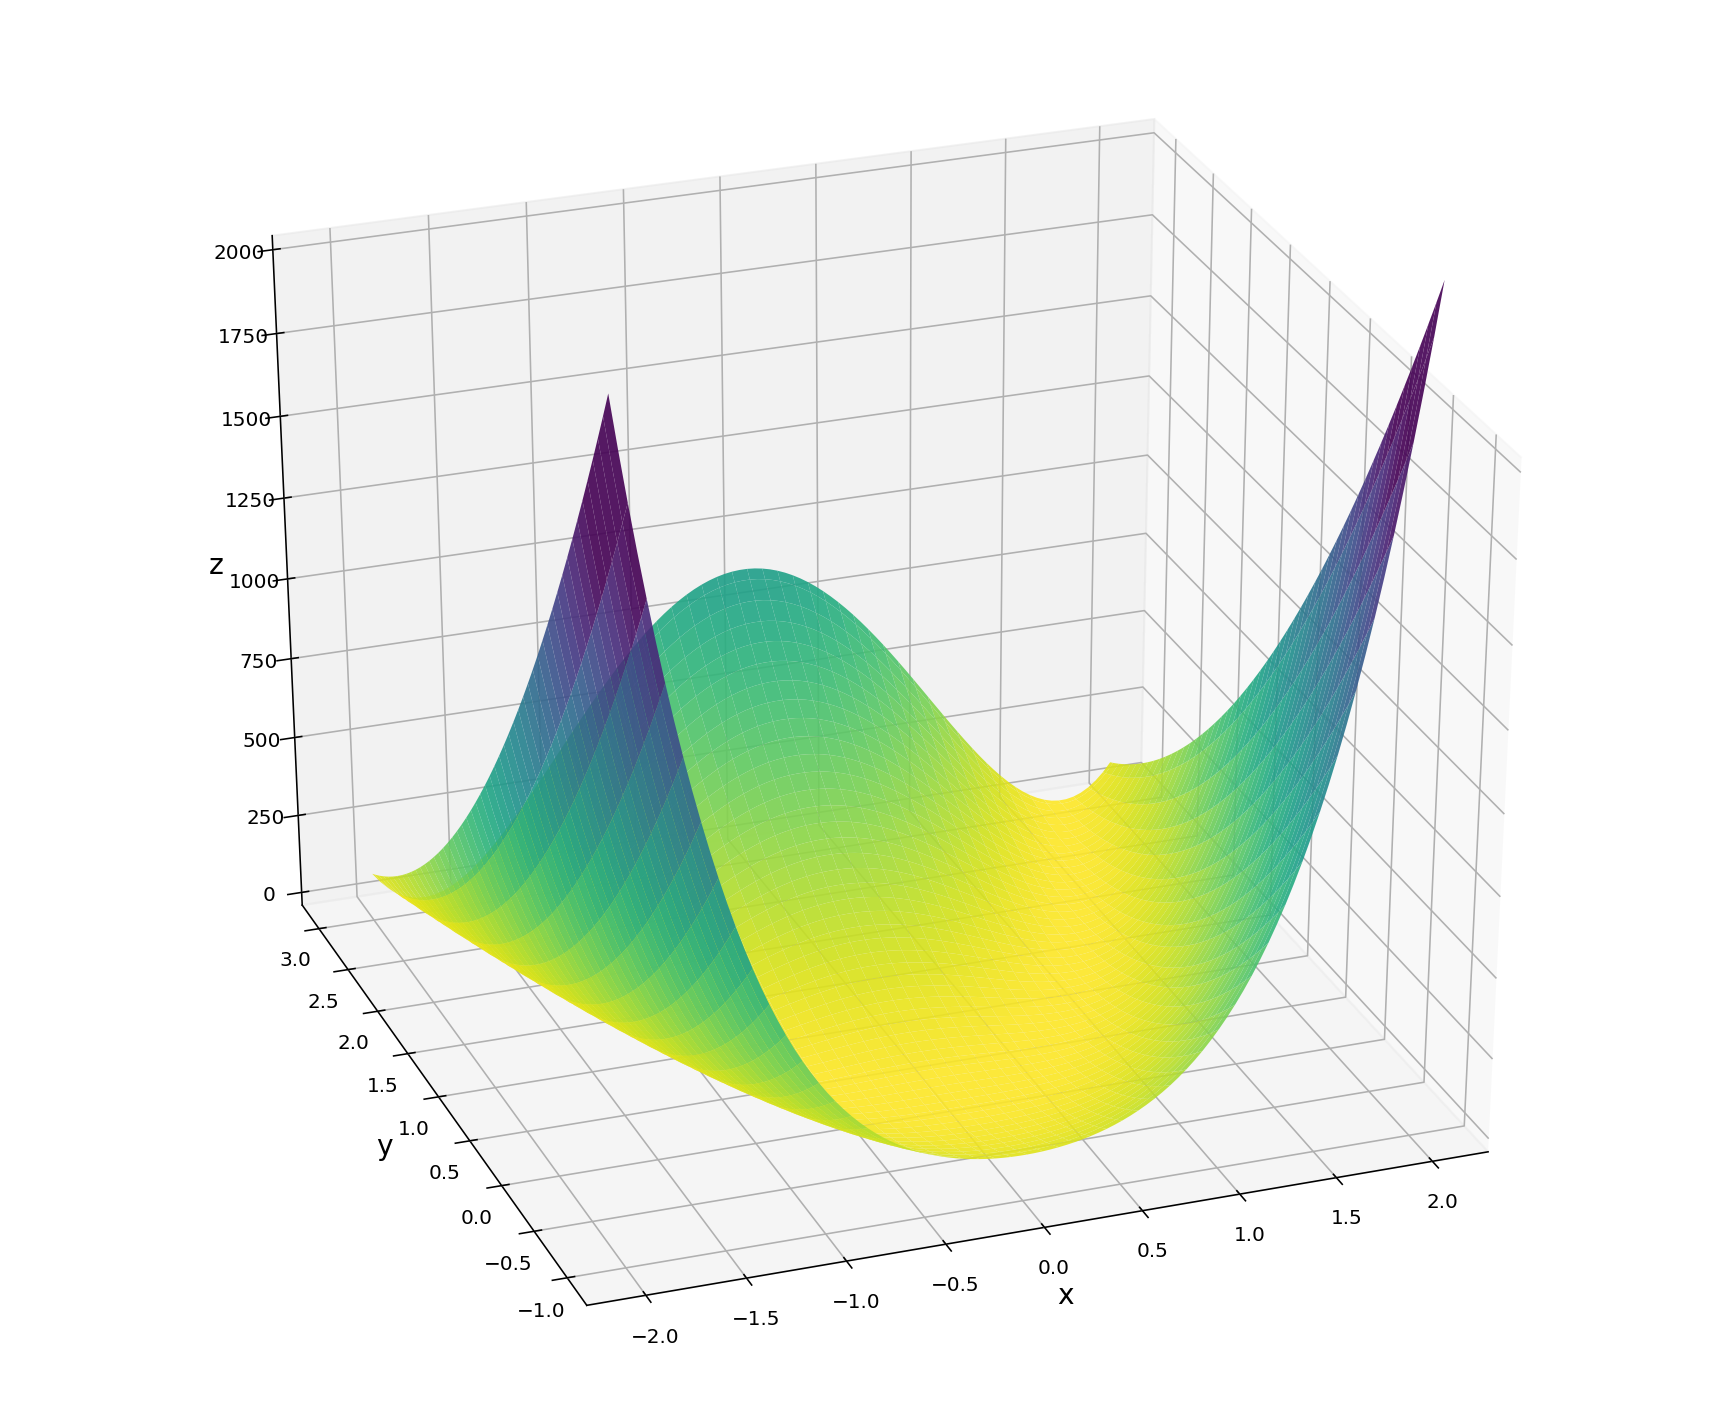

In [3]:
fig = plt.figure(figsize=(12,10))

# Make grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
#norm = matplotlib.colors.Normalize(vmin = 0, vmax = 100, clip = True)
#ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis_r', norm=norm)
ax.plot_surface(X, Y, Z, alpha=0.9, cmap='viridis_r', vmin=0, vmax=2000)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
ax.set_zlim(0, 2000)
ax.view_init(30, 250)

plt.tight_layout()

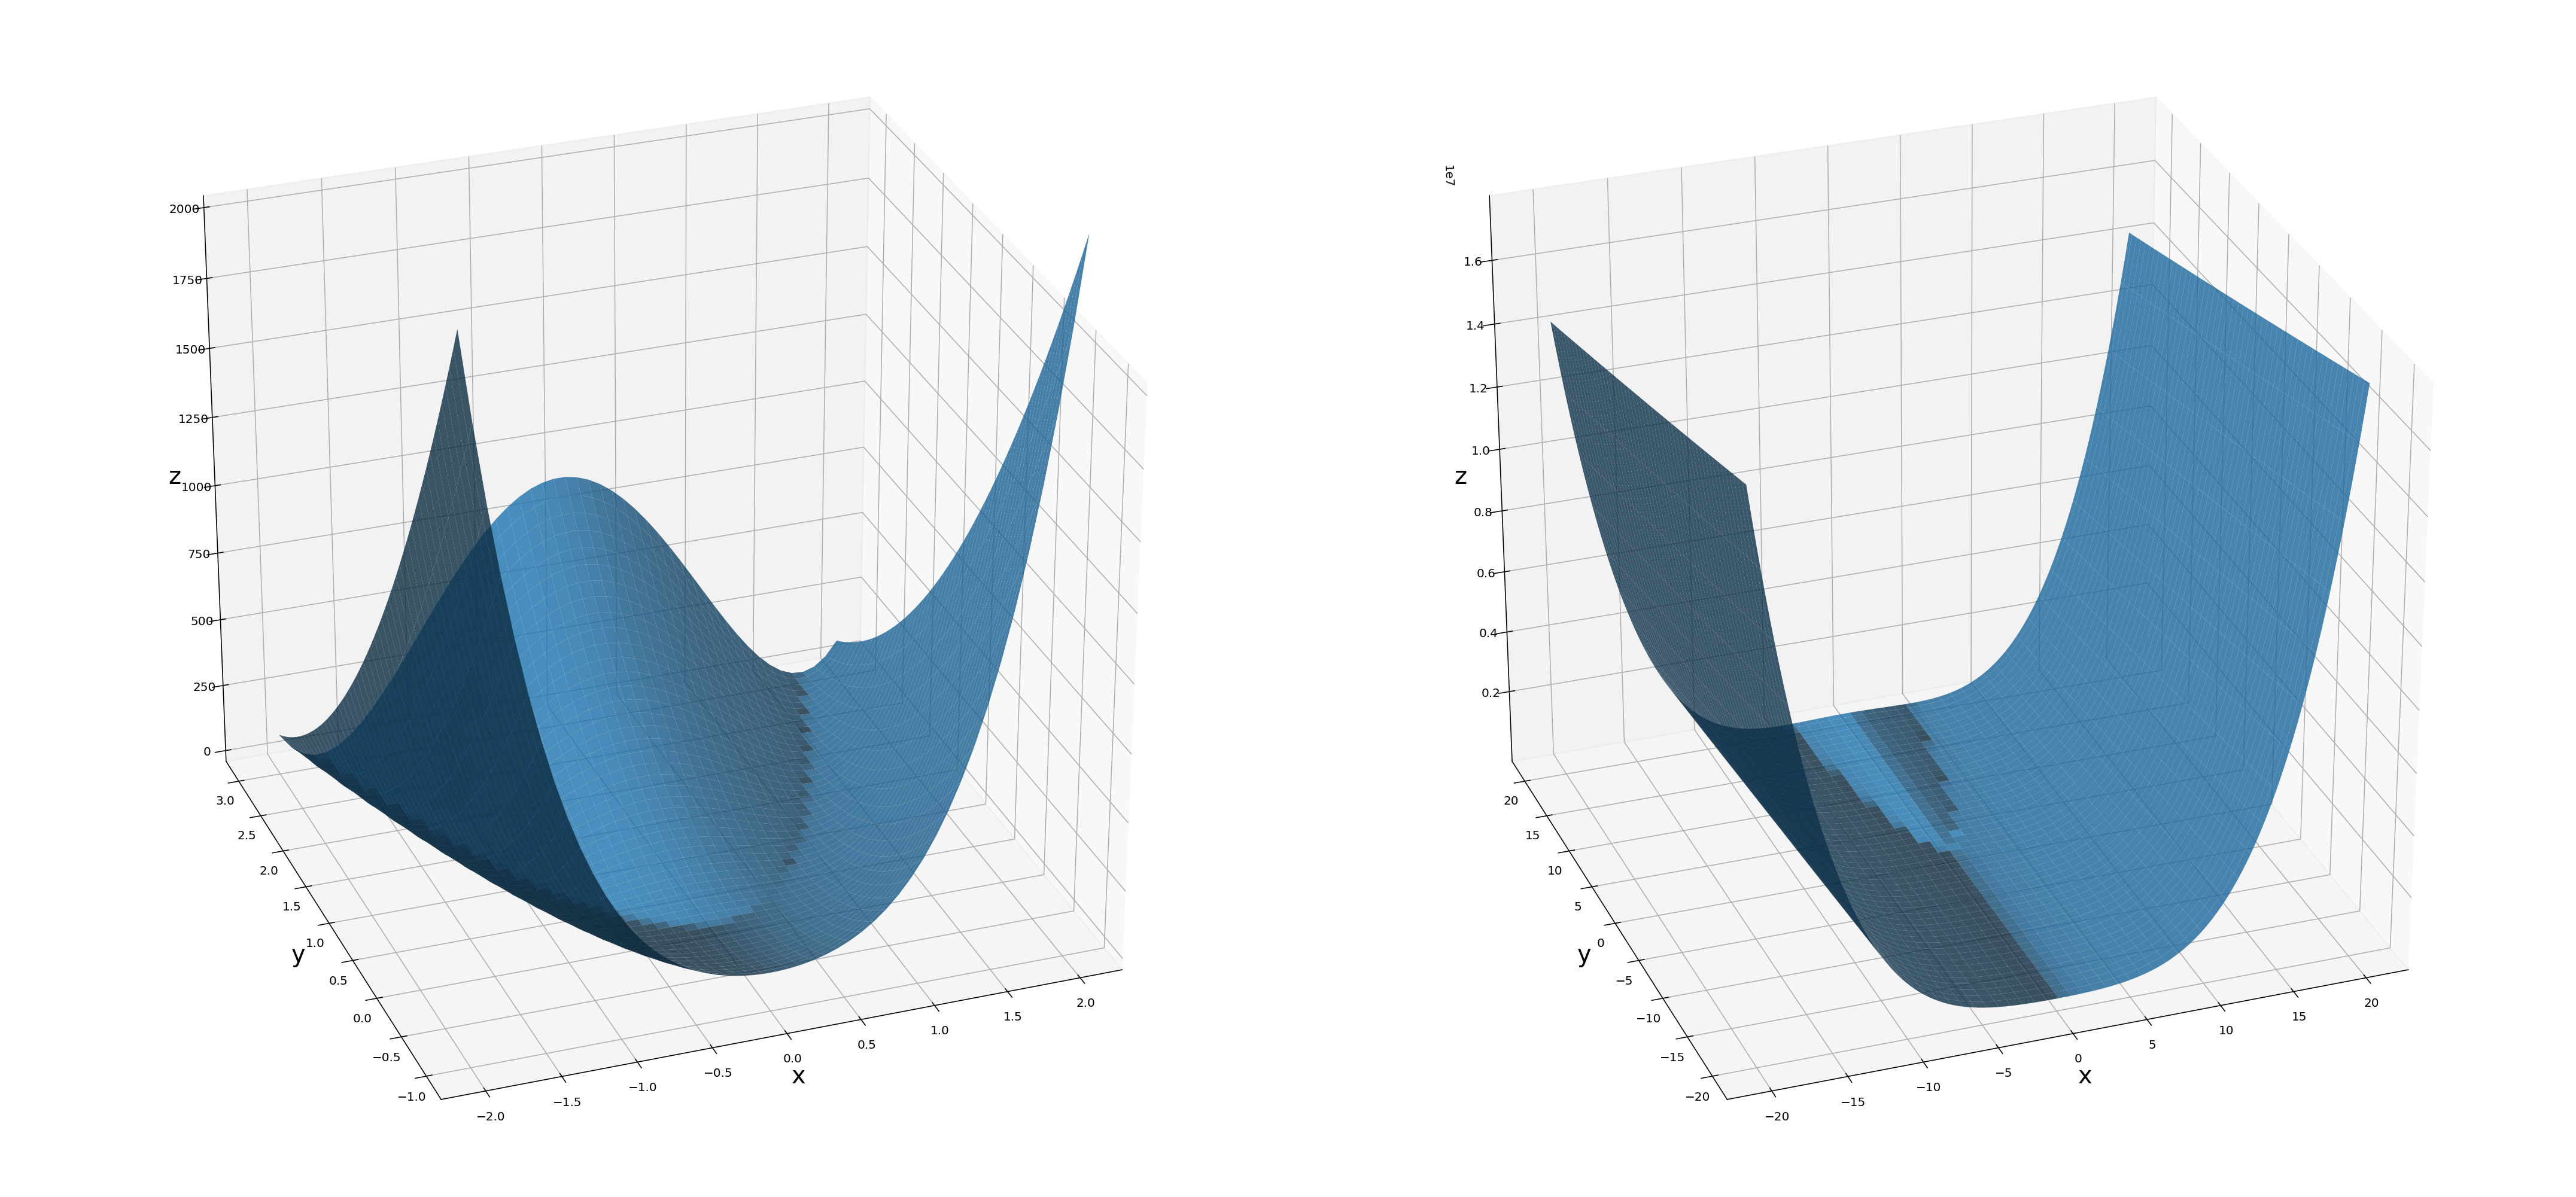

In [4]:
fig = plt.figure(figsize=(30, 14))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax_0 = fig.add_subplot(1, 2, 1, projection='3d')

x = np.linspace(-2, 2, 50)
y = np.linspace(-1, 3, 50)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)
ax_0.plot_surface(X, Y, Z, alpha=0.8, linewidth=0, antialiased=True)
#ax_0.contour3D(X, Y, Z, 100, cmap='binary_r')
#ax_0.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax_0.set_xlabel('x', fontsize=20)
ax_0.set_ylabel('y', fontsize=20)
ax_0.set_zlabel('z', fontsize=20)
ax_0.set_zlim(0, 2000)
ax_0.view_init(30, 250)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax_1 = fig.add_subplot(1, 2, 2, projection='3d')

x = np.linspace(-20, 20, 150)
y = np.linspace(-20, 20, 150)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_func(X, Y)
ax_1.plot_surface(X, Y, Z, alpha=0.8, linewidth=0, antialiased=True)
#ax_1.contour3D(X, Y, Z, 1000, cmap='binary_r')
#ax_1.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax_1.set_xlabel('x', fontsize=20)
ax_1.set_ylabel('y', fontsize=20)
ax_1.set_zlabel('z', fontsize=20)
ax_1.view_init(30, 250)


fig.tight_layout()

In [5]:
fig.savefig("rosenbrock.png", bbox_inches='tight', dpi=600)

Определим функцию Розенброка:

In [6]:
def func(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

Инициализируем метод роя частиц

In [7]:
class Particle:    
    def __init__(self, arg, search_space):
        self.pos = np.asarray([])      # расположение частицы
        self.velocity = np.asarray([]) # вектор скорости частицы
        self.pos_best = None           # лучшее расположение 
        
        for i in range(arg):
            pos_i = np.random.uniform(search_space[i][0], search_space[i][1])
            self.pos = np.append(self.pos, pos_i)
            vel_i = np.random.uniform(0.2 * search_space[i][0] , 0.2 * search_space[i][1])
            self.velocity = np.append(self.velocity, vel_i)
        
        # pos_best --- это список, состоящий из лучшего расположения частицы 
        # и значения функции в данной точке
        self.pos_best = [self.pos.copy(), func(self.pos)] 
    
    def update_position(self):
        self.pos += self.velocity
    
    def update_velocity(self, w, c1, c2, swarm_best):
        inertion = w * self.velocity
        cognitive_acceler = c1 * np.random.uniform() * (self.pos_best[0] - self.pos)
        social_acceler = c2 * np.random.uniform() * (swarm_best - self.pos)
        self.velocity = inertion + cognitive_acceler + social_acceler
    
    def choose_personal_best(self):
         if func(self.pos) < func(self.pos_best[0]):
                    self.pos_best[0] = self.pos.copy()
                    self.pos_best[1] = func(self.pos)

In [8]:
class ParticleSwarmOptimisation:
    def __init__(self, ell=40, w=1.0, c1=0.2, c2=0.2, max_iter=1000, tol=1e-6):
        """
        PARAMETERS:
        ell --- количество частиц в рое.
        w --- инерционный вес.
        c1 --- коэффициент ускорения когнитивного воздействия на частицу.
        c2 --- коэффициент ускорения социального воздействия на частицу.
        max_iter --- максимальное количество итераций.
        tol --- точность.
        """
        self.ell = ell
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.max_iter = max_iter
        self.tol = tol
        
        self.swarm_best = None # лучшее расположение для всего роя
        self.swarm = None      # расположение всех частиц (рой)
        
    def search_global(self, arg, search_space):
        """
        PARAMETERS:
        arg --- количество аргументов функции.
        search_space --- область поиска оптимума. Задается как список из кортежей, где 
        кортеж --- это область значений одного аргумента функции.
        """
        self.arg = arg
        self.search_space = np.array(search_space)
        self.swarm = np.asarray([])
        
        # генерируем расположение роя 
        for _ in range(self.ell):
            self.swarm = np.append(self.swarm, 
                                   Particle(self.arg, self.search_space))
    
        for k in range(self.max_iter):
            for i in range(self.ell):
                # обновляем расположение частицы
                self.swarm[i].update_position()
                # сравниваем с лучшей точкой частицы
                self.swarm[i].choose_personal_best()
            
            # выбираем лучшую точку для роя
            if k != 0:
                dist_0 = self.dist(self.swarm_best[0])
                self.choose_social_best()
                dist_1 = self.dist(self.swarm_best[0])
                
                # останавливаем поиск в условиях заданной точности
                if (dist_0 != dist_1) and (abs(dist_0 - dist_1) <= self.tol):
                    break
            else:
                self.choose_social_best()
                
            # обновляем вектор скорости
            for i in range(self.ell):
                self.swarm[i].update_velocity(self.w, self.c1, self.c2, self.swarm_best[0])
        
        print(f"Глобальный оптимум: {self.swarm_best[0]}.")
        print(f"Значение функции в данной точке: {self.swarm_best[1]}.")
        
        
    def choose_social_best(self):
        self.swarm_best = min([[self.swarm[i].pos_best[0], 
                                self.swarm[i].pos_best[1]] for i in range(self.ell)],
                                key=lambda x: x[1])
        
    def dist(self, x):
        return np.sqrt(np.sum(x ** 2))

In [9]:
a = ParticleSwarmOptimisation(w=0.95, ell=100, tol=1e-20)

In [10]:
np.random.seed(53)
a.search_global(2, [(-10, 10),(-10, 10)])

Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 6.366439023928984e-22.


In [11]:
np.random.seed(53)
%timeit a.search_global(2, [(-10, 10),(-10, 10)])

Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 6.366439023928984e-22.
Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 5.942341366989282e-22.
Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 1.9539173742386574e-21.
Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 7.036545720598447e-25.
Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 2.5185902838094217e-22.
Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 2.218922834587525e-22.
Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 3.047063480508407e-23.
Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 1.1470615787355122e-20.
2.22 s ± 746 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Для графиков

In [12]:
import copy

In [13]:
class ParticleSwarmOptimisation:
    def __init__(self, ell=40, w=1.0, c1=0.2, c2=0.2, max_iter=1000, tol=1e-6):
        """
        PARAMETERS:
        ell --- количество частиц в рое.
        w --- инерционный вес.
        c1 --- коэффициент ускорения когнитивного воздействия на частицу.
        c2 --- коэффициент ускорения социального воздействия на частицу.
        max_iter --- максимальное количество итераций.
        tol --- точность.
        """
        self.ell = ell
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.max_iter = max_iter
        self.tol = tol
        
        self.swarm_best = None # лучшее расположение для всего роя
        self.swarm = None      # расположение всех частиц (рой)
        self.func_history = None # для графика
        self.x_0 = None
        self.x_50 = None
        self.x_100 = None
        self.x_150 = None
        self.x_300 = None
        self.x_999 = None
        self.v_0 = None
        self.v_50 = None
        self.v_100 = None
        self.v_150 = None
        self.v_300 = None
        self.v_999 = None
        
    def search_global(self, arg, search_space):
        """
        PARAMETERS:
        arg --- количество аргументов функции.
        search_space --- область поиска оптимума. Задается как список из кортежей, где 
        кортеж --- это область значений одного аргумента функции.
        """
        self.arg = arg
        self.search_space = np.array(search_space)
        self.swarm = np.asarray([])
        self.func_history = []
        self.x_0 = []
        
        
        # генерируем расположение роя 
        for _ in range(self.ell):
            self.swarm = np.append(self.swarm, 
                                   Particle(self.arg, self.search_space))
        # для графика 
        self.x_0 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
        self.v_0 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
        
        for k in range(self.max_iter):
            for i in range(self.ell):
                # обновляем расположение частицы
                self.swarm[i].update_position()
                # сравниваем с лучшей точкой частицы
                self.swarm[i].choose_personal_best()
            
            # выбираем лучшую точку для роя
            if k != 0:
                dist_0 = self.dist(self.swarm_best[0])
                self.choose_social_best()
                dist_1 = self.dist(self.swarm_best[0])
                
                # для графика
                self.func_history.append(func(self.swarm_best[0]))
                
                # останавливаем поиск в условиях заданной точности
                if (dist_0 != dist_1) and (abs(dist_0 - dist_1) <= self.tol):
                    break
            else:
                self.choose_social_best()
                # для графика
                self.func_history.append(func(self.swarm_best[0]))
            
            # для графика
            if k == 50:
                self.x_50 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_50 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # для графика
            if k == 100:
                self.x_100 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_100 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # для графика
            if k == 150:
                self.x_150 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_150 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # для графика 
            if k == 300:
                self.x_300 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
                self.v_300 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
                
            # обновляем вектор скорости
            for i in range(self.ell):
                self.swarm[i].update_velocity(self.w, self.c1, self.c2, self.swarm_best[0])
        
        # для графика 
        self.x_999 = copy.deepcopy([self.swarm[i].pos for i in range(self.ell)])
        self.v_999 = copy.deepcopy([self.swarm[i].velocity for i in range(self.ell)])
        
        print(f"Глобальный оптимум: {self.swarm_best[0]}.")
        print(f"Значение функции в данной точке: {self.swarm_best[1]}.")
        
        
    def choose_social_best(self):
        self.swarm_best = min([[self.swarm[i].pos_best[0], 
                                self.swarm[i].pos_best[1]] for i in range(self.ell)],
                                key=lambda x: x[1])
        
    def dist(self, x):
        return np.sqrt(np.sum(x ** 2))

In [14]:
a = ParticleSwarmOptimisation(w=0.95, ell=100, tol=1e-20)

In [15]:
np.random.seed(53)
a.search_global(2, [(-10, 10),(-10, 10)])

Глобальный оптимум: [1. 1.].
Значение функции в данной точке: 6.366439023928984e-22.


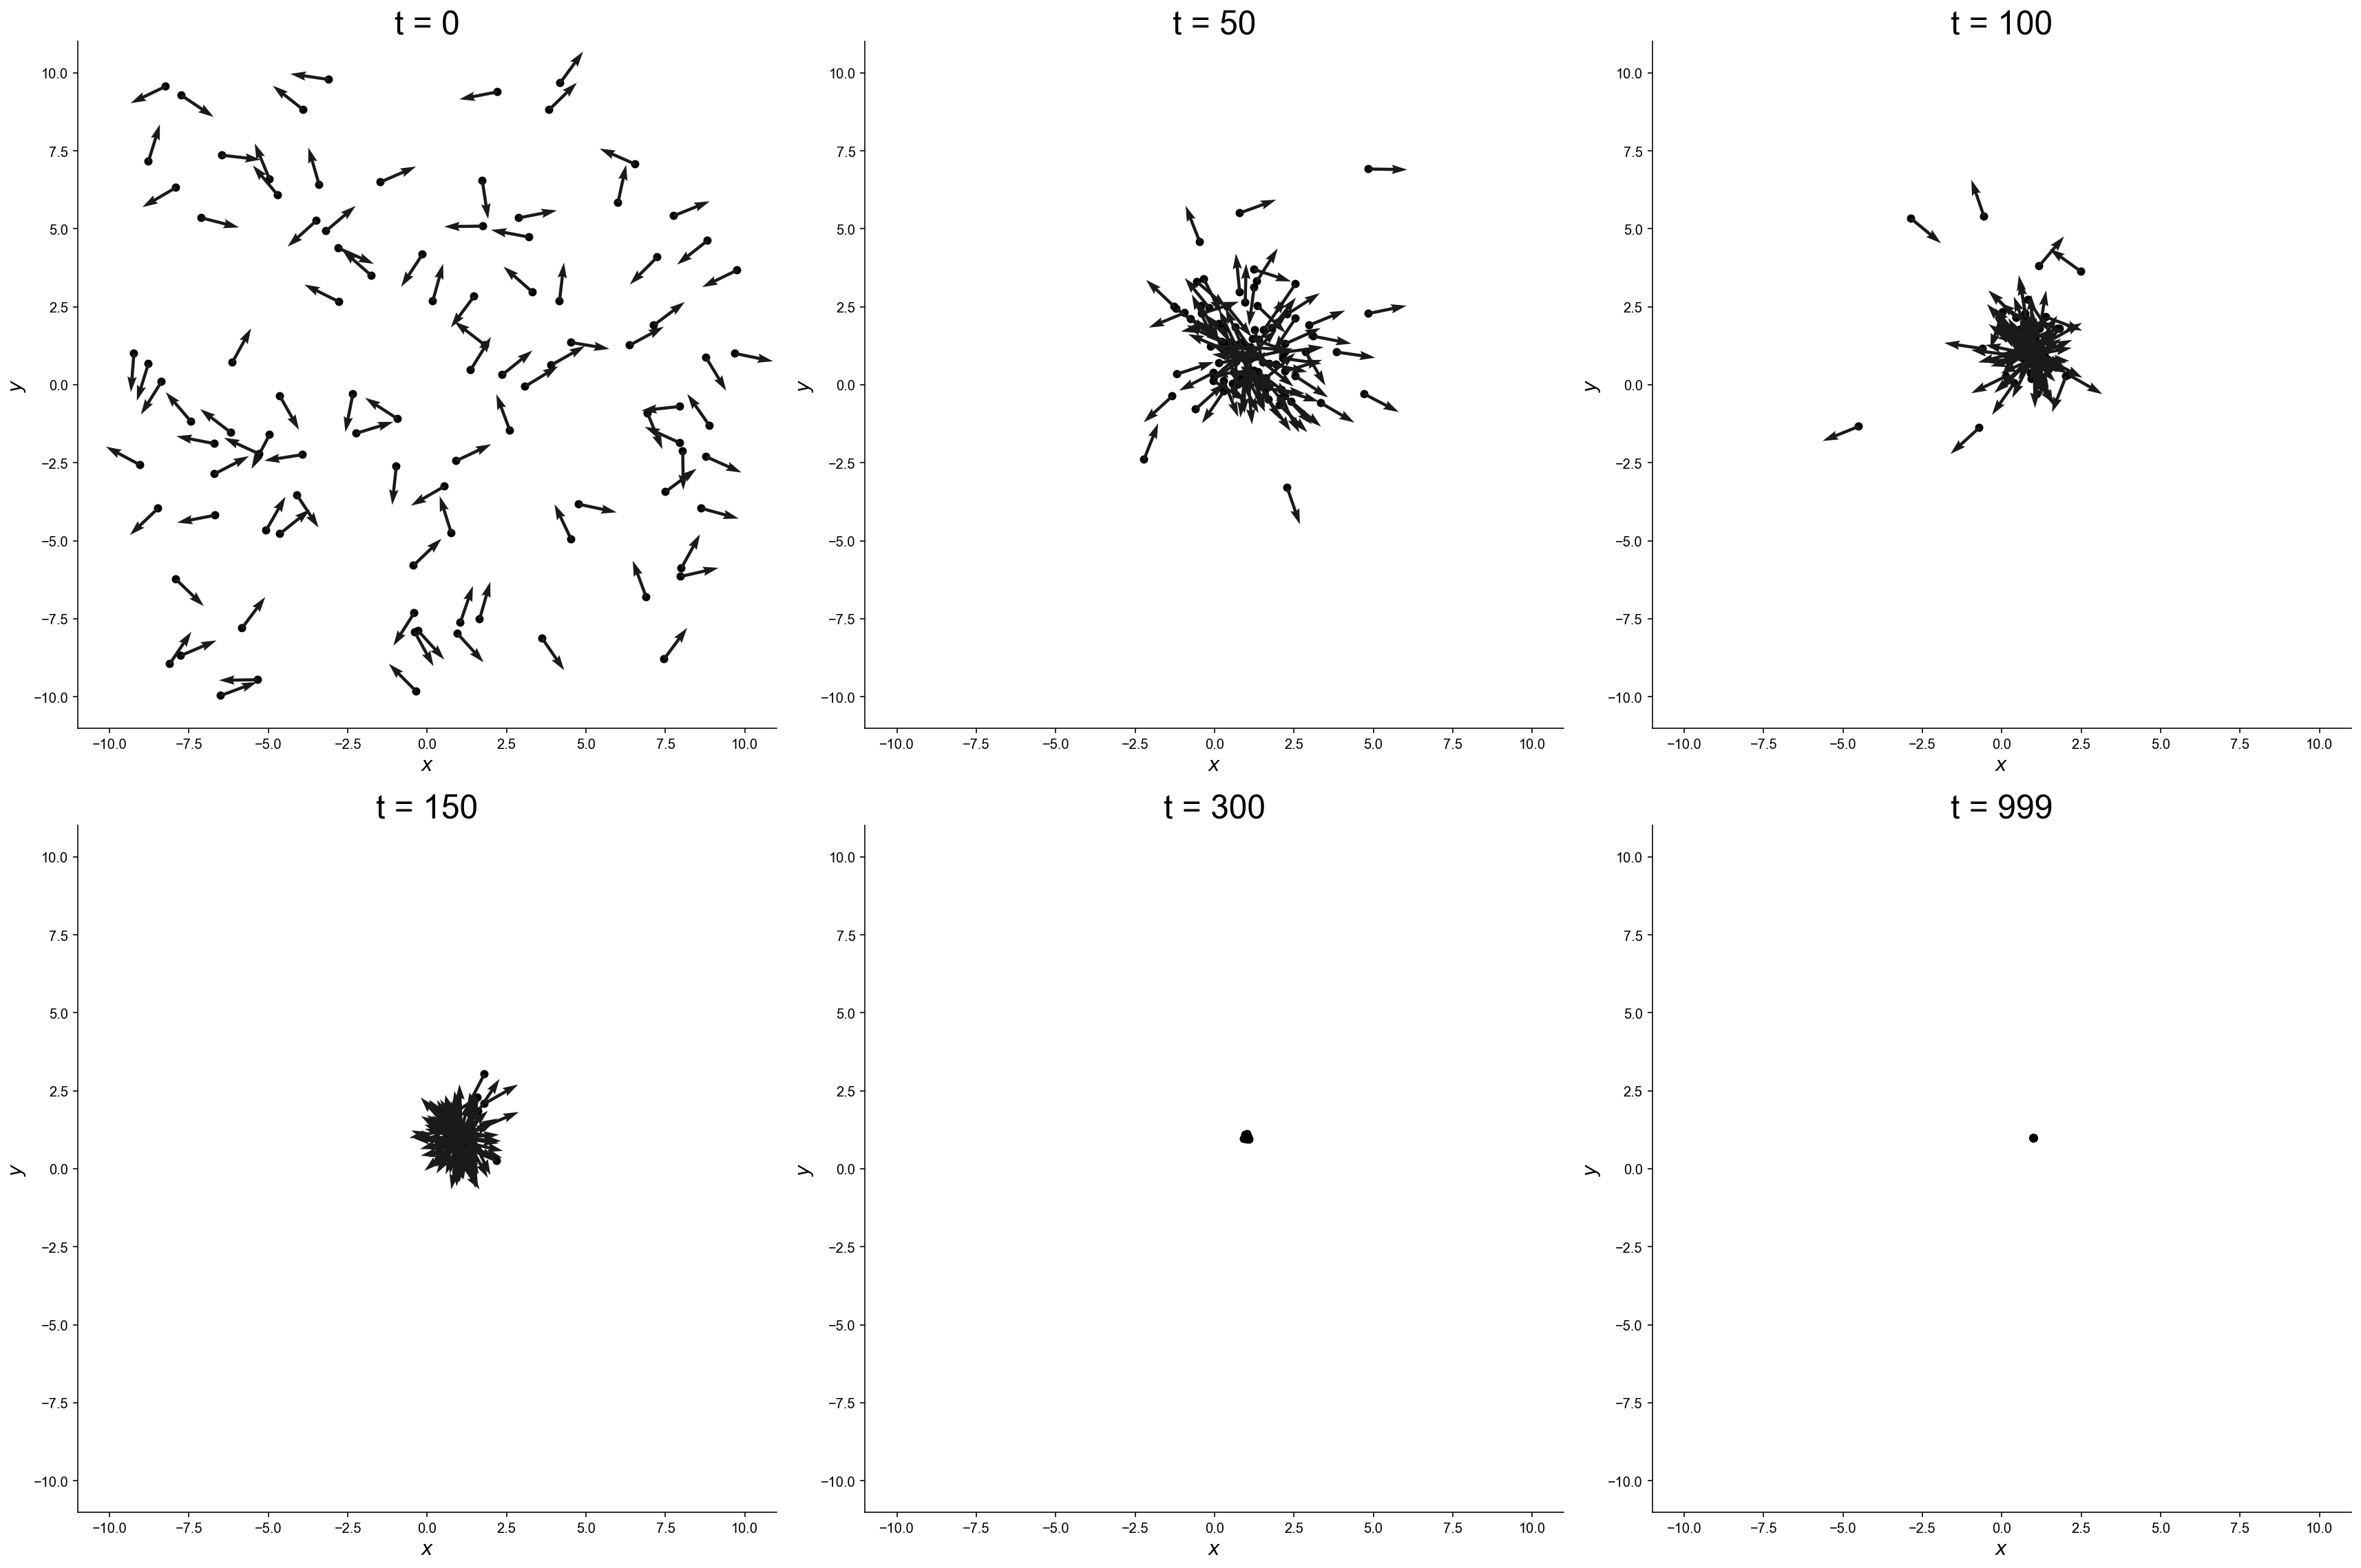

In [16]:
fig = plt.figure(figsize=(24, 16))
spec = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
fig_ax_1 = fig.add_subplot(spec[0, 0])
fig_ax_2 = fig.add_subplot(spec[0, 1])
fig_ax_3 = fig.add_subplot(spec[0, 2])
fig_ax_4 = fig.add_subplot(spec[1, 0])
fig_ax_5 = fig.add_subplot(spec[1, 1])
fig_ax_6 = fig.add_subplot(spec[1, 2])

sns.set()
sns.set_style("white")

axs = [fig_ax_1, fig_ax_2, fig_ax_3, fig_ax_4, fig_ax_5, fig_ax_6]
t = [0, 50, 100, 150, 300, 999]
swarm = [a.x_0, a.x_50, a.x_100, a.x_150, a.x_300, a.x_999]
velocity = [a.v_0, a.v_50, a.v_100, a.v_150, a.v_300, a.v_999]
z = 0

for ax in axs:
    ax.set_title("t = {}".format(t[z]), fontsize=24)
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$y$', fontsize=14)
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)
        
    xs = []
    ys = []
        
    for particle in swarm[z]:
        xs.append(particle[0])
        ys.append(particle[1])
        
    ax.scatter(xs, ys, marker="o", s=25, color="black")
        
    if t[z] < 300:
        for k in range(len(swarm[z])):
            ax.quiver(swarm[z][k][0], swarm[z][k][1], 
                      velocity[z][k][0] / np.sqrt(velocity[z][k][0] ** 2 + velocity[z][k][1] ** 2), 
                      velocity[z][k][1] / np.sqrt(velocity[z][k][0] ** 2 + velocity[z][k][1] ** 2),
                      scale_units='xy', minshaft=2.5) #color='#1f77b4'
                    
    z += 1


fig.tight_layout()

In [17]:
fig.savefig("swarm.png".format(t), bbox_inches='tight', dpi=600)

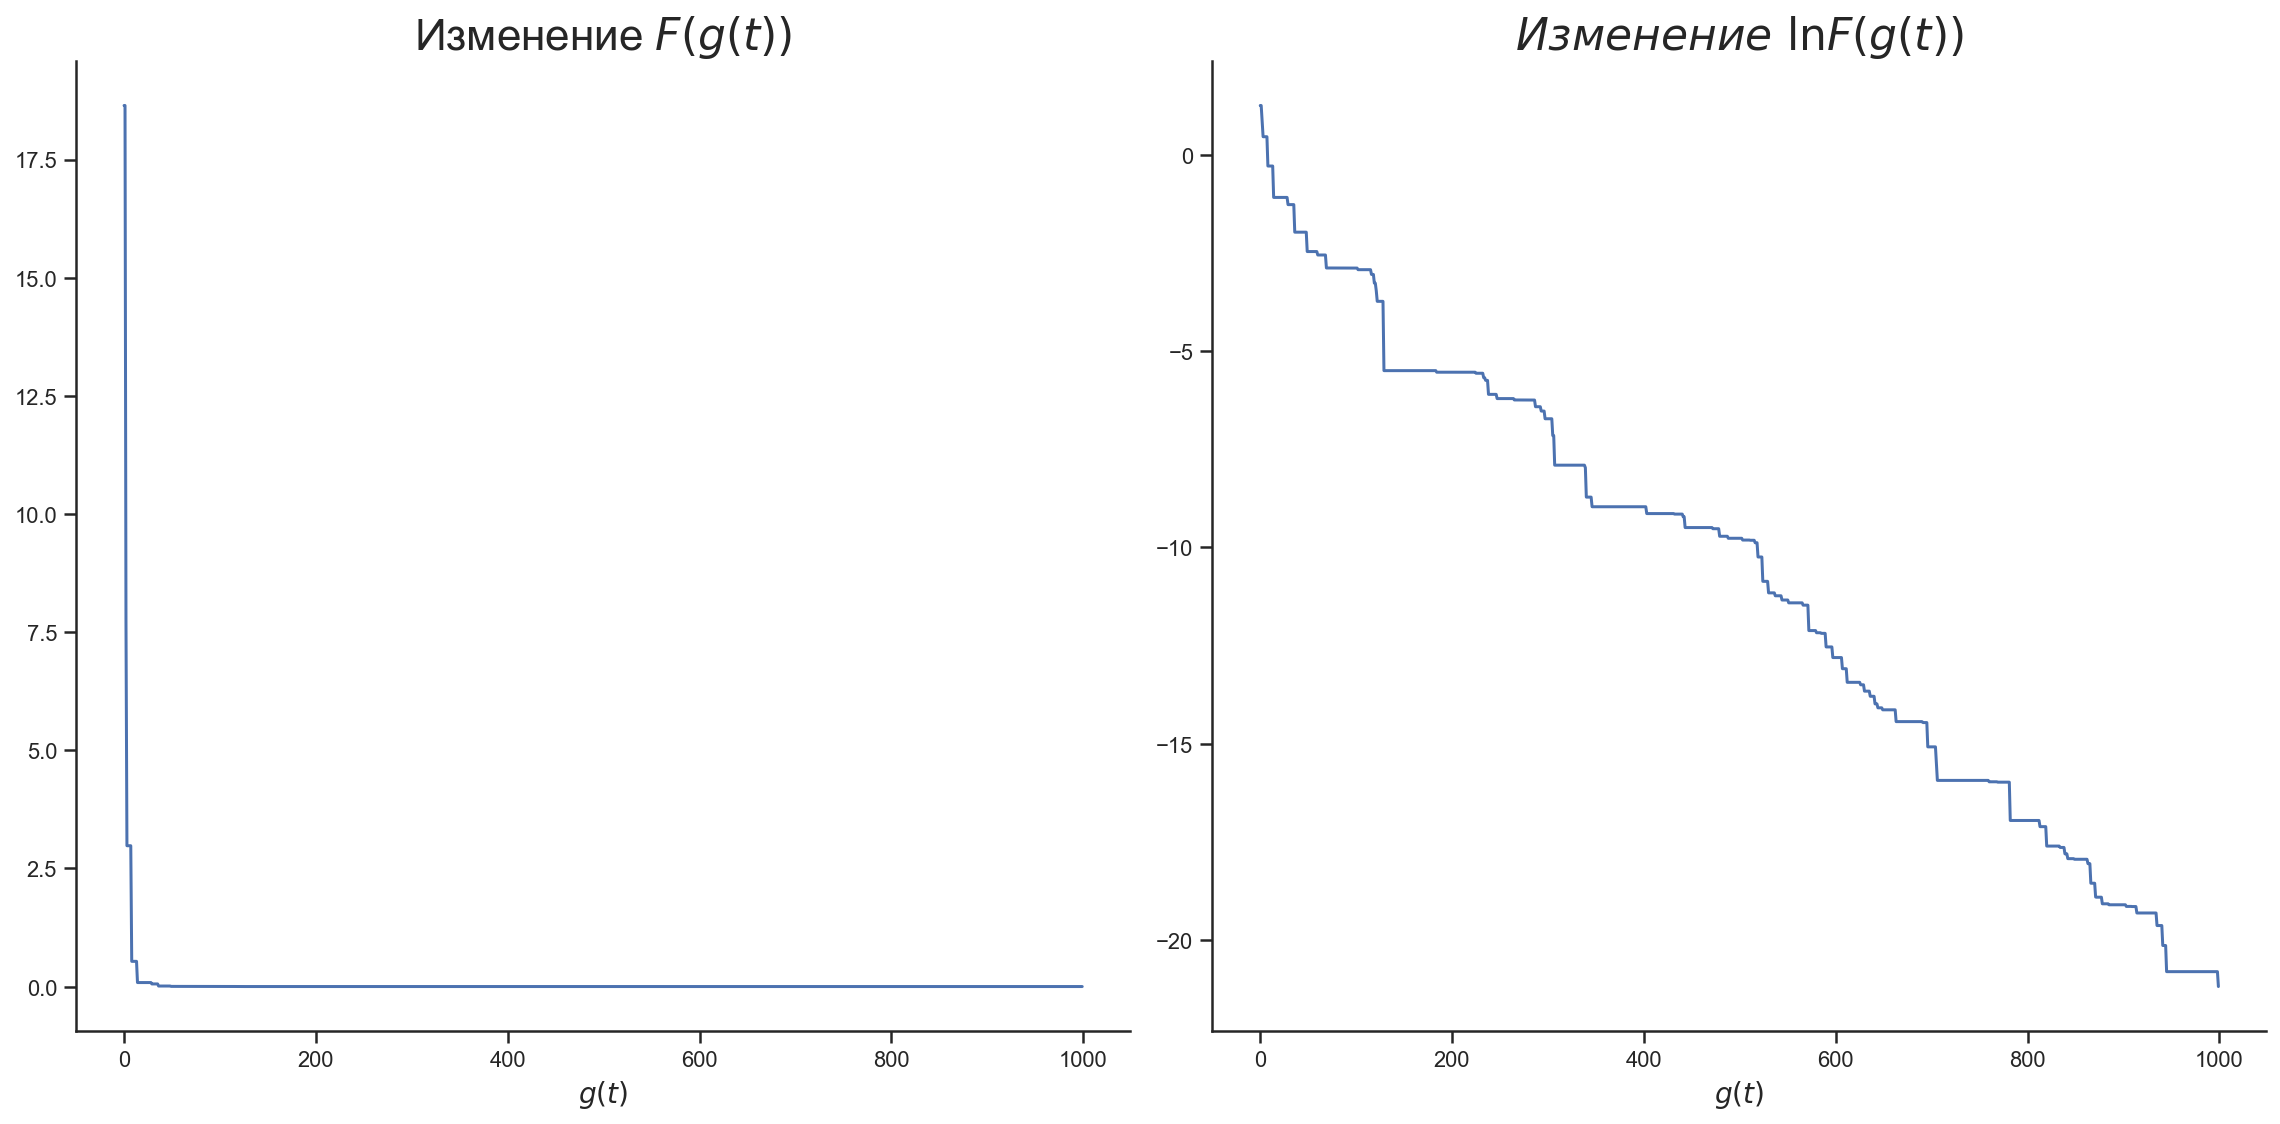

In [24]:
fig = plt.figure(figsize=(16, 8))

ax_0 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
ax_1 = plt.subplot2grid((1, 6), (0, 3), colspan=3)

ax_0.spines["top"].set_visible(False)  
ax_0.spines["right"].set_visible(False)
ax_0.get_xaxis().tick_bottom()  
ax_0.get_yaxis().tick_left() 
ax_0.set_xlabel("$g(t)$", fontsize=14)  
ax_0.set_title("Изменение $F(g(t))$", fontsize=22)
ax_0.plot(a.func_history)

ax_1.spines["top"].set_visible(False)  
ax_1.spines["right"].set_visible(False)
ax_1.get_xaxis().tick_bottom()  
ax_1.get_yaxis().tick_left() 
ax_1.set_xlabel("$g(t)$", fontsize=14)  
ax_1.set_title("Изменение $\ln F(g(t))$", fontsize=22)
ax_1.plot(np.log10(a.func_history))

fig.tight_layout()

In [25]:
fig.savefig("PSO.png".format(t), bbox_inches='tight', dpi=600)